Diagnosing the 'offset' issue between images and coronal hole masks:

In [13]:
import numpy as np  
import matplotlib.pyplot as plt
import glymur
import sunpy.cm as cm
%matplotlib notebook

Load in an example coronal hole data set.

In [9]:
ch=np.load('/Volumes/SolarData/LabeledImages/2013_02/label_masks/2013_02_01__00_13_31__CH_mask.npz')
chole = ch['arr_0'] 

Load in correspoding aia 193 image.

In [10]:
aia=glymur.Jp2k('/Volumes/SolarData/LabeledImages/2013_02/jp2/2013_02_01__00_13_42_84__SDO_AIA_AIA_193.jp2')
aia193=aia[:]

Creating a masked array to combine coronal hole mask and aia image.

<IPython.core.display.Javascript object>


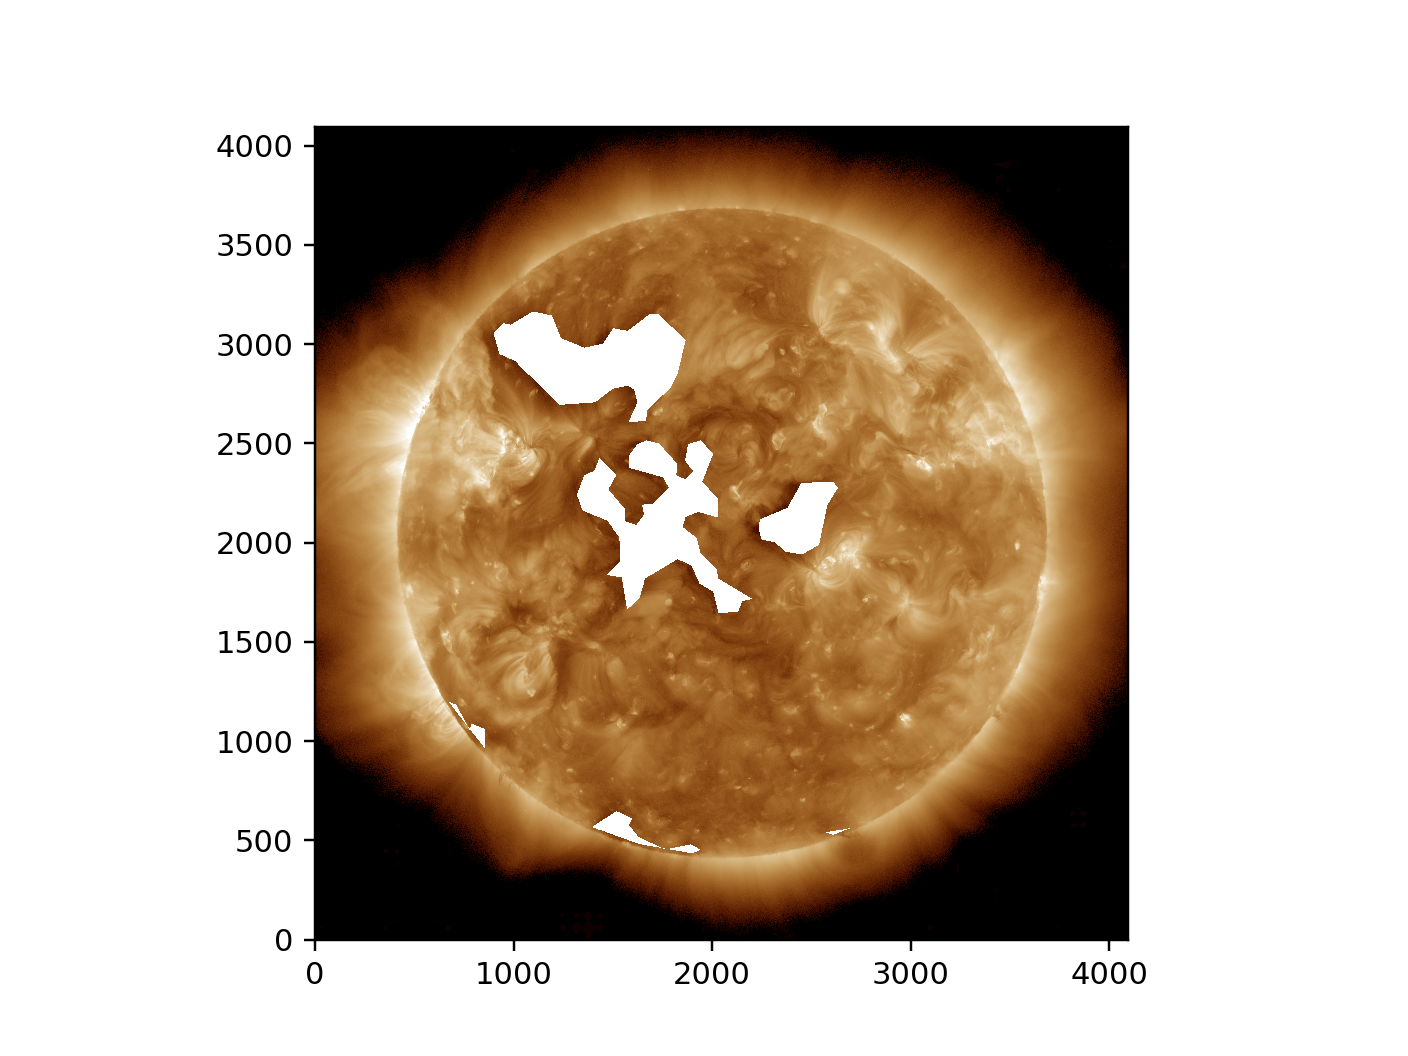

In [14]:
masked = np.ma.array(aia193[::-1])
masked.mask = chole
sdoaia193 = plt.get_cmap('sdoaia193')
plt.imshow(masked, origin='bottom', cmap=sdoaia193)

Zoom in on a specific coronal hole (SPoCA 8301. Notice the significant dark region on the left size of the image. This should be included in the CH. 

<IPython.core.display.Javascript object>


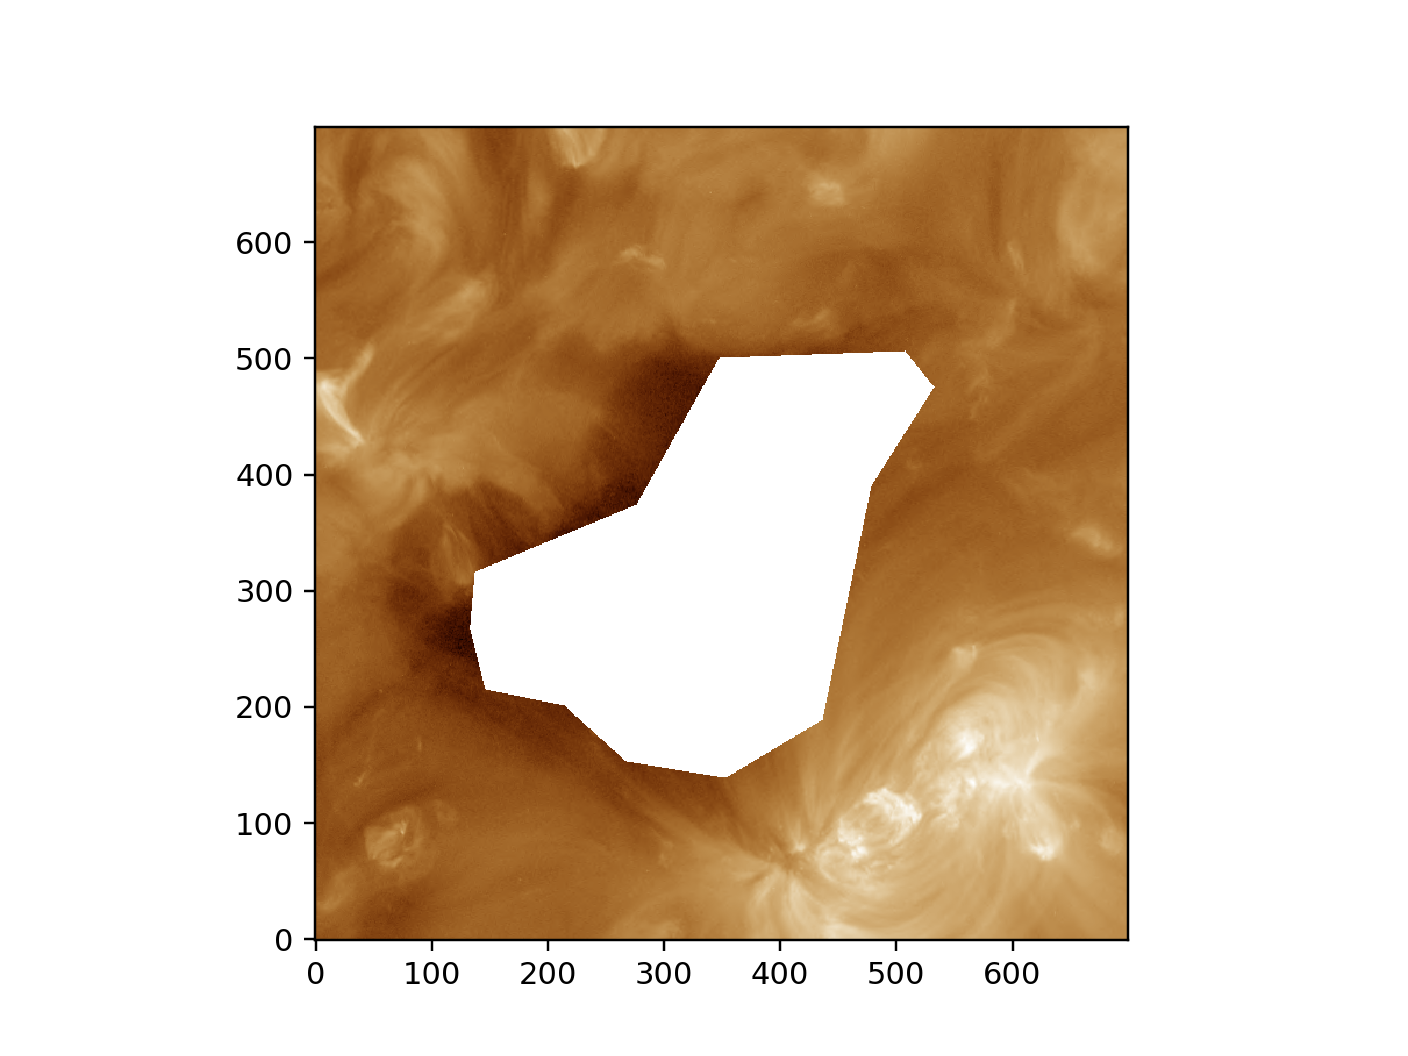

In [16]:
plt.imshow(masked[1800:2500,2100:2800], origin='bottom', cmap=sdoaia193)

If we extract the hole, you can see the bright region on the right side that should be excluded.

<IPython.core.display.Javascript object>


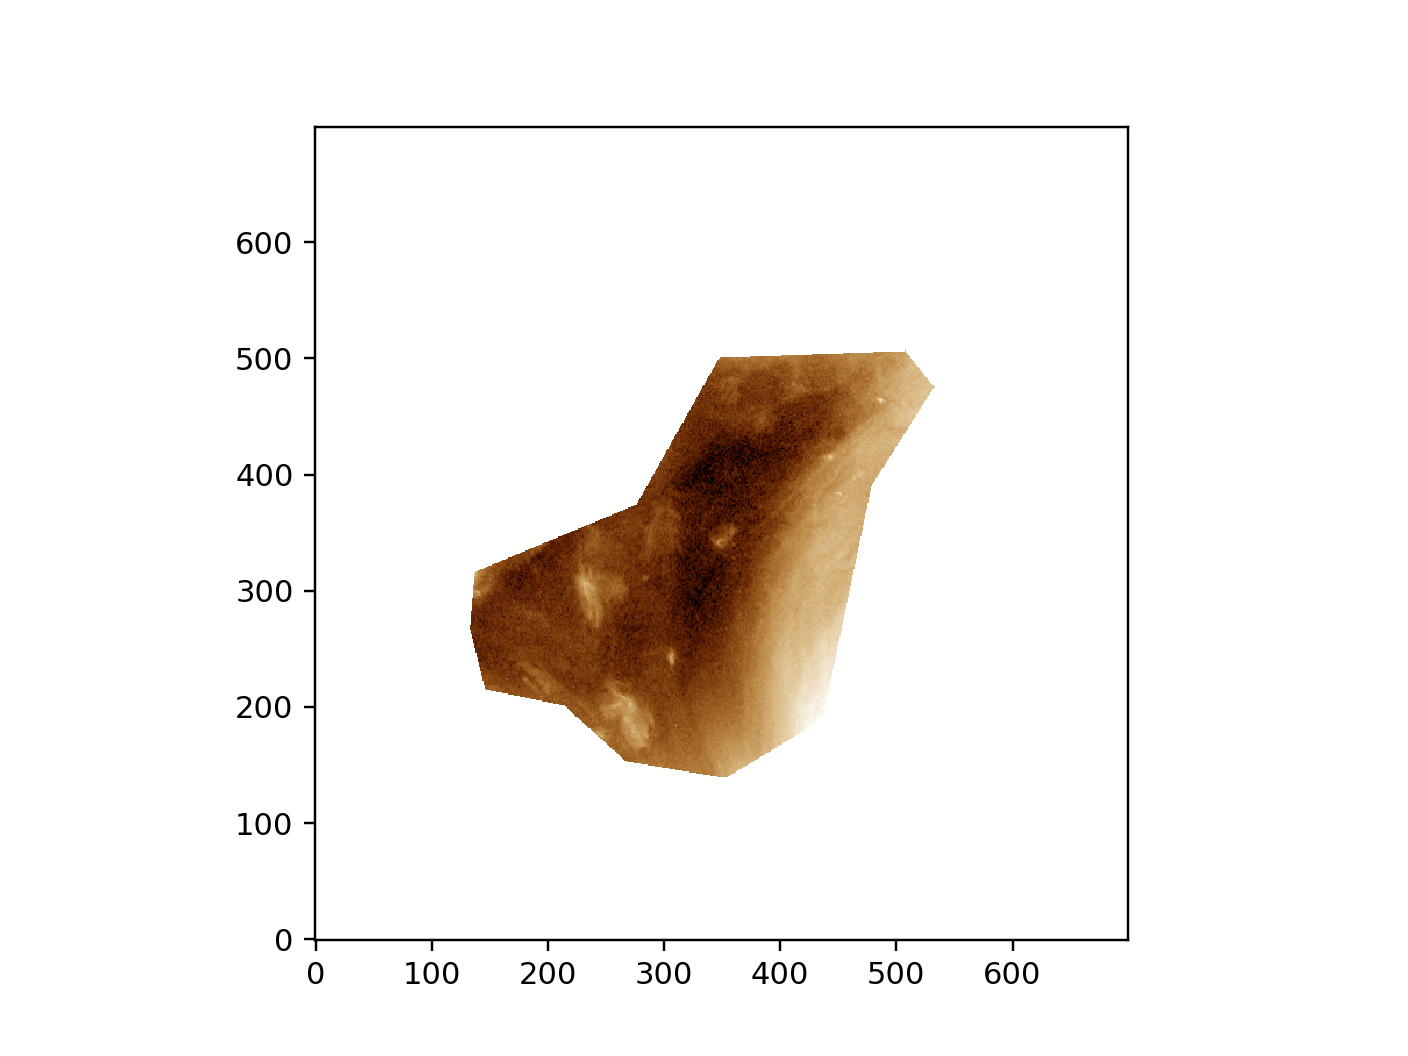

In [17]:
masked2 = np.ma.array(aia193[::-1])
masked2.mask = np.invert(chole)
plt.imshow(masked2[1800:2500,2100:2800], origin='bottom', cmap=sdoaia193)

Layering the two maps together illustrate how poorly the segmented boundaries from the npz file match the JP2.

<IPython.core.display.Javascript object>


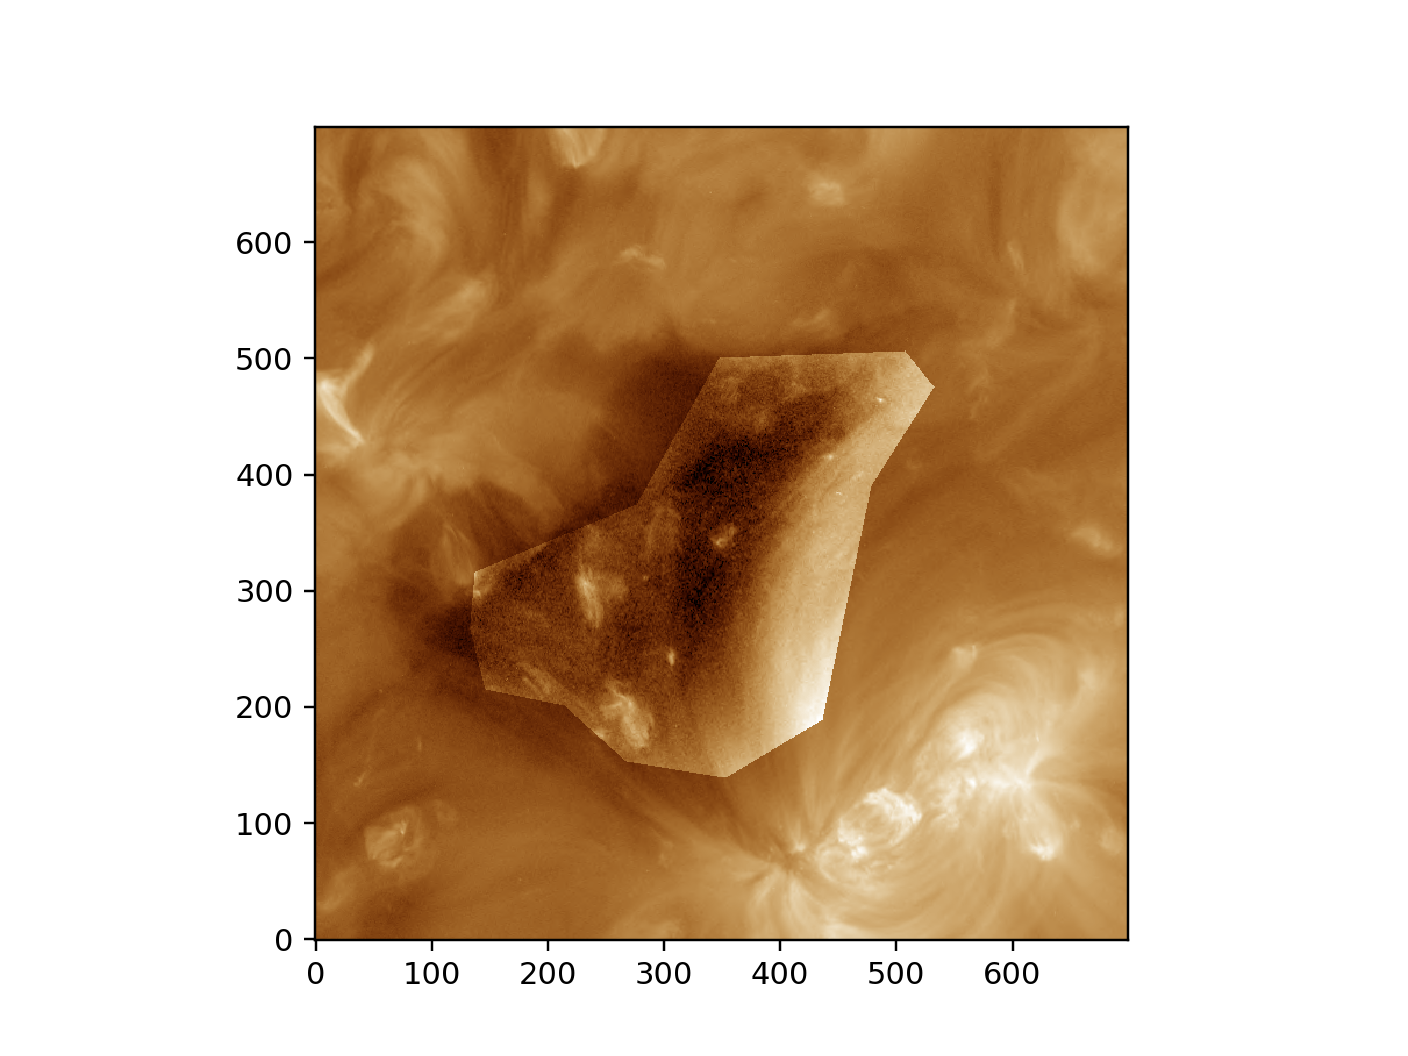

In [18]:
plt.imshow(masked[1800:2500,2100:2800], origin='bottom', cmap=sdoaia193)
plt.imshow(masked2[1800:2500,2100:2800], origin='bottom', cmap=sdoaia193)

Looking at how active regions line up using the same technique: 

In [27]:
ar=np.load('/Volumes/SolarData/LabeledImages/2013_02/label_masks/2013_02_01__03_13_36__AR_mask.npz')
aregion = ar['arr_0'] 
aia=glymur.Jp2k('/Volumes/SolarData/LabeledImages/2013_02/jp2/2013_02_01__03_13_42_84__SDO_AIA_AIA_193.jp2')
aia193=aia[:]

<IPython.core.display.Javascript object>


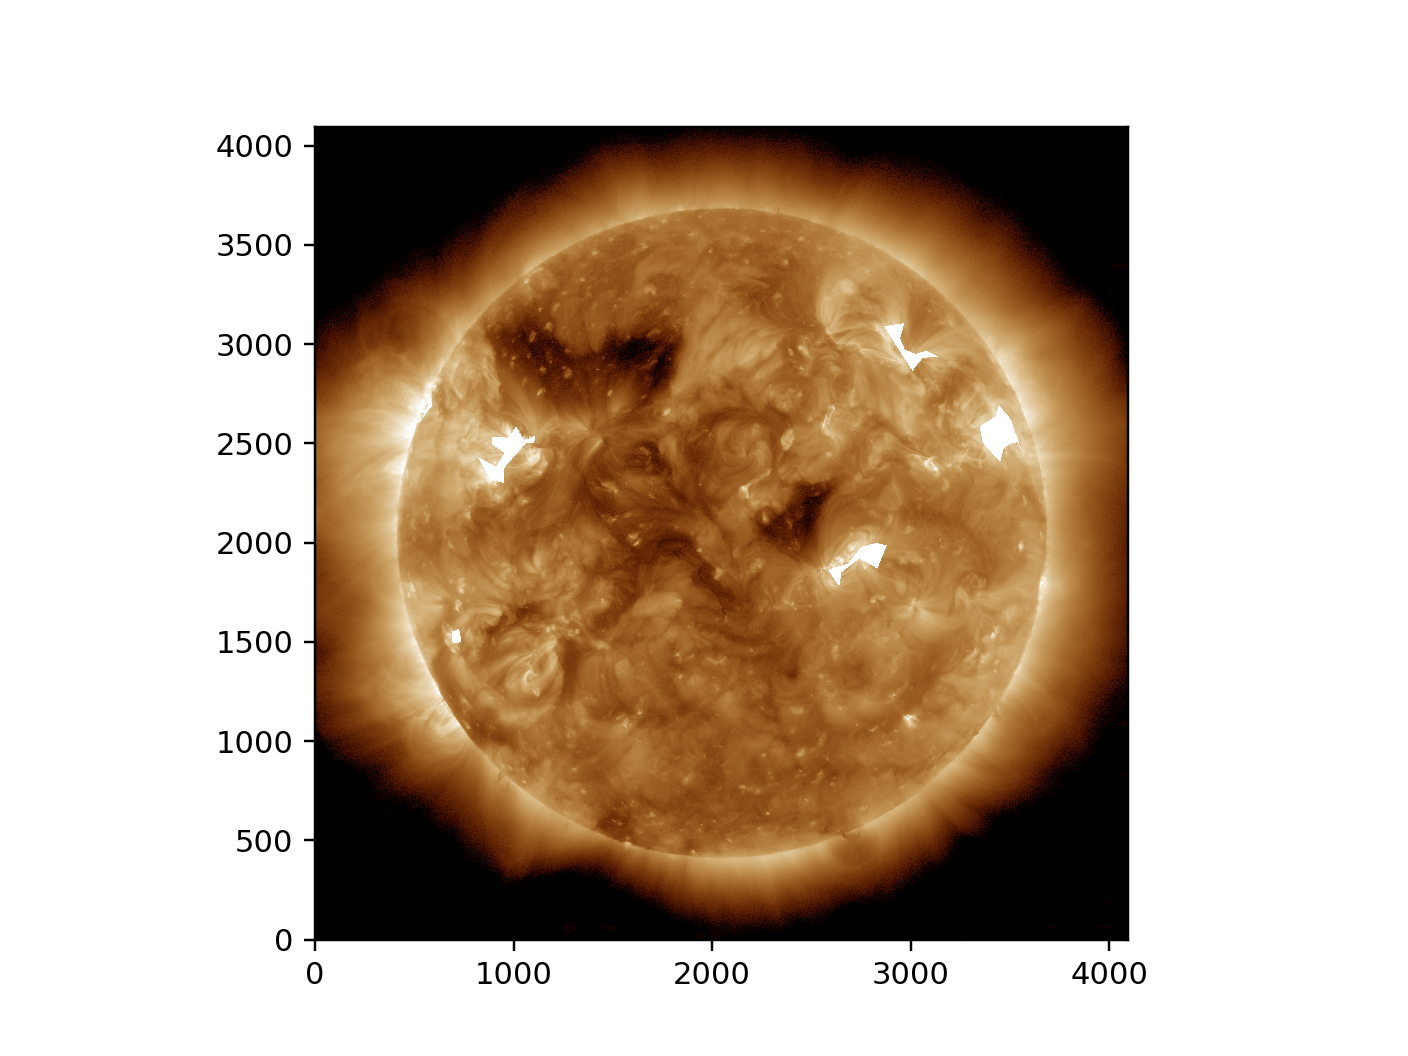

In [28]:
masked = np.ma.array(aia193[::-1])
masked.mask = aregion
plt.imshow(masked, origin='bottom', cmap=sdoaia193)

<IPython.core.display.Javascript object>


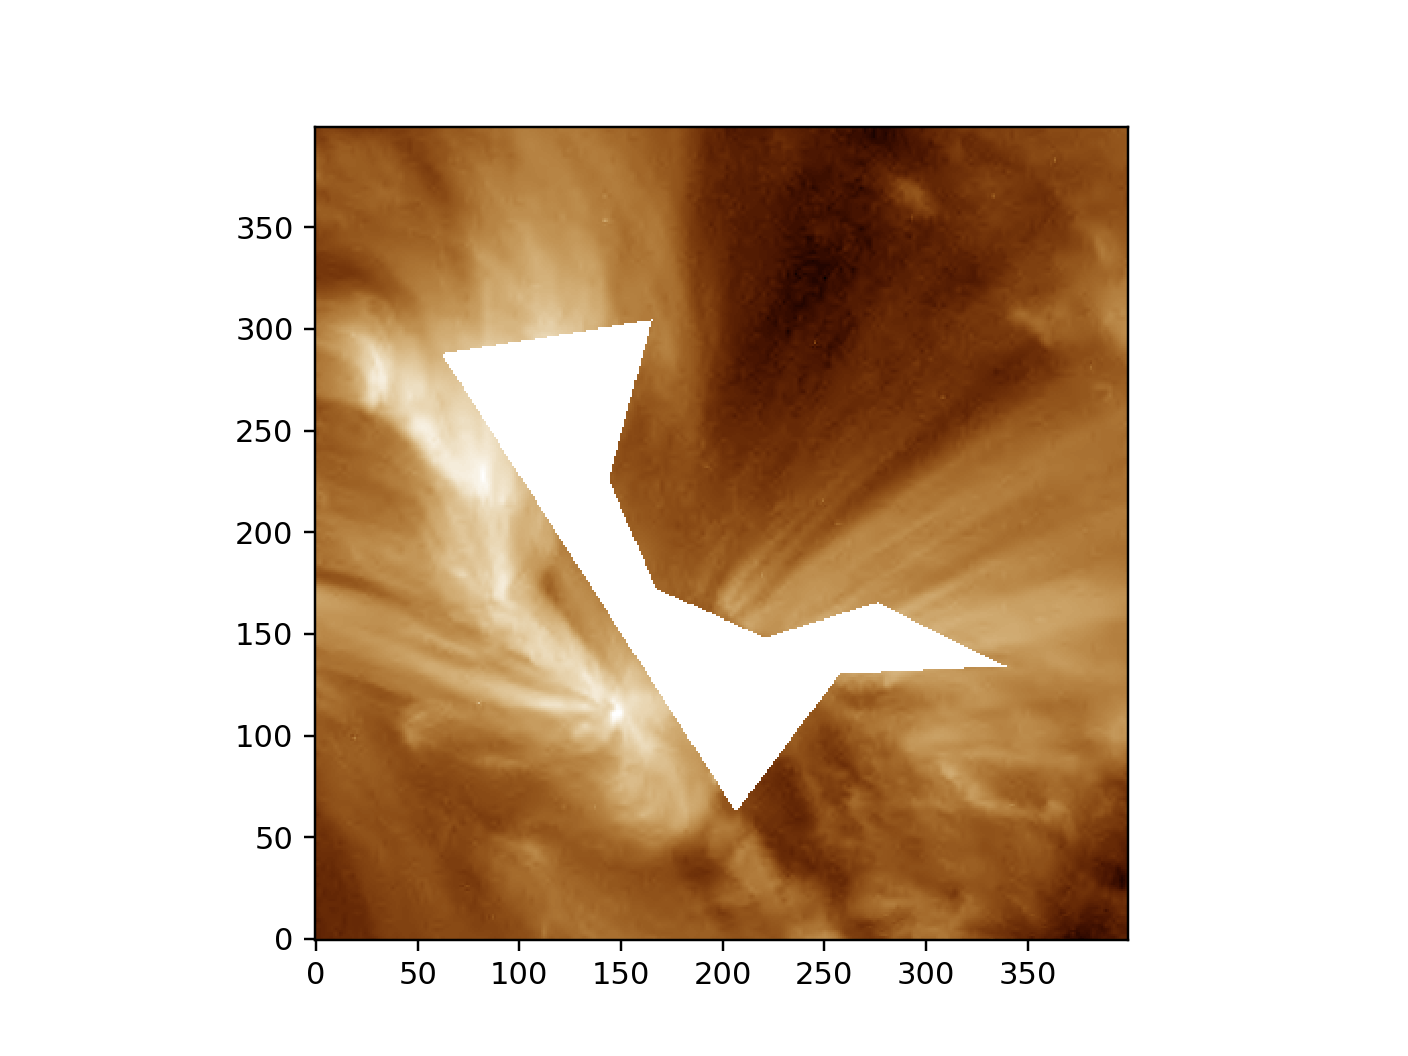

In [31]:
plt.imshow(masked[2800:3200,2800:3200], origin='bottom', cmap=sdoaia193)

<IPython.core.display.Javascript object>


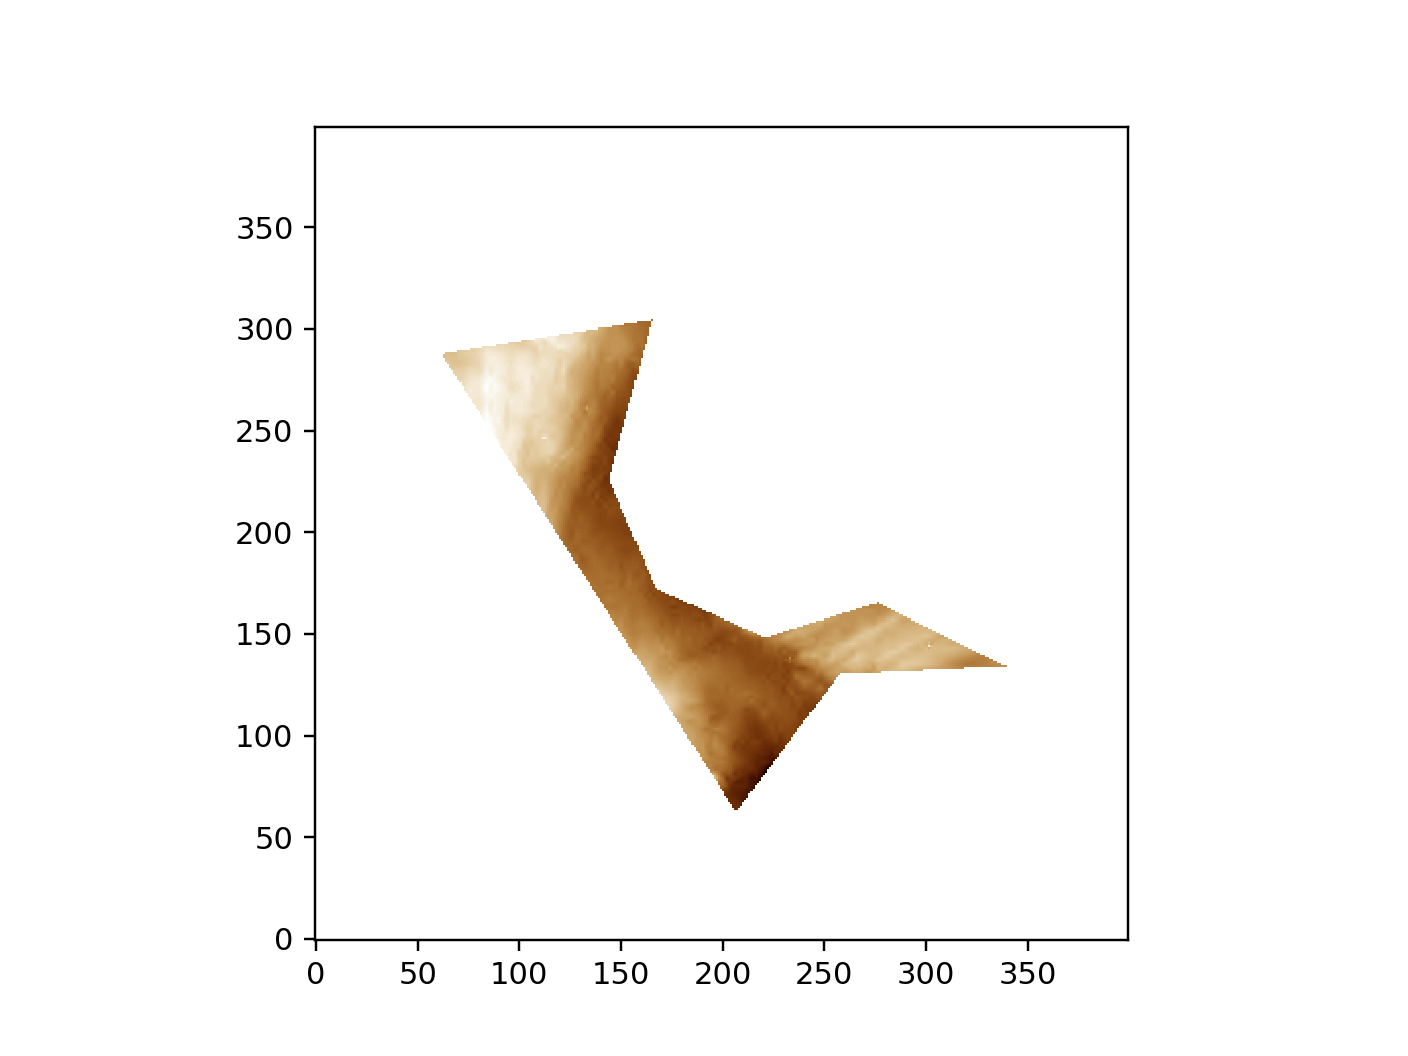

In [32]:
masked2 = np.ma.array(aia193[::-1])
masked2.mask = np.invert(aregion)
plt.imshow(masked2[2800:3200,2800:3200], origin='bottom', cmap=sdoaia193)

<IPython.core.display.Javascript object>


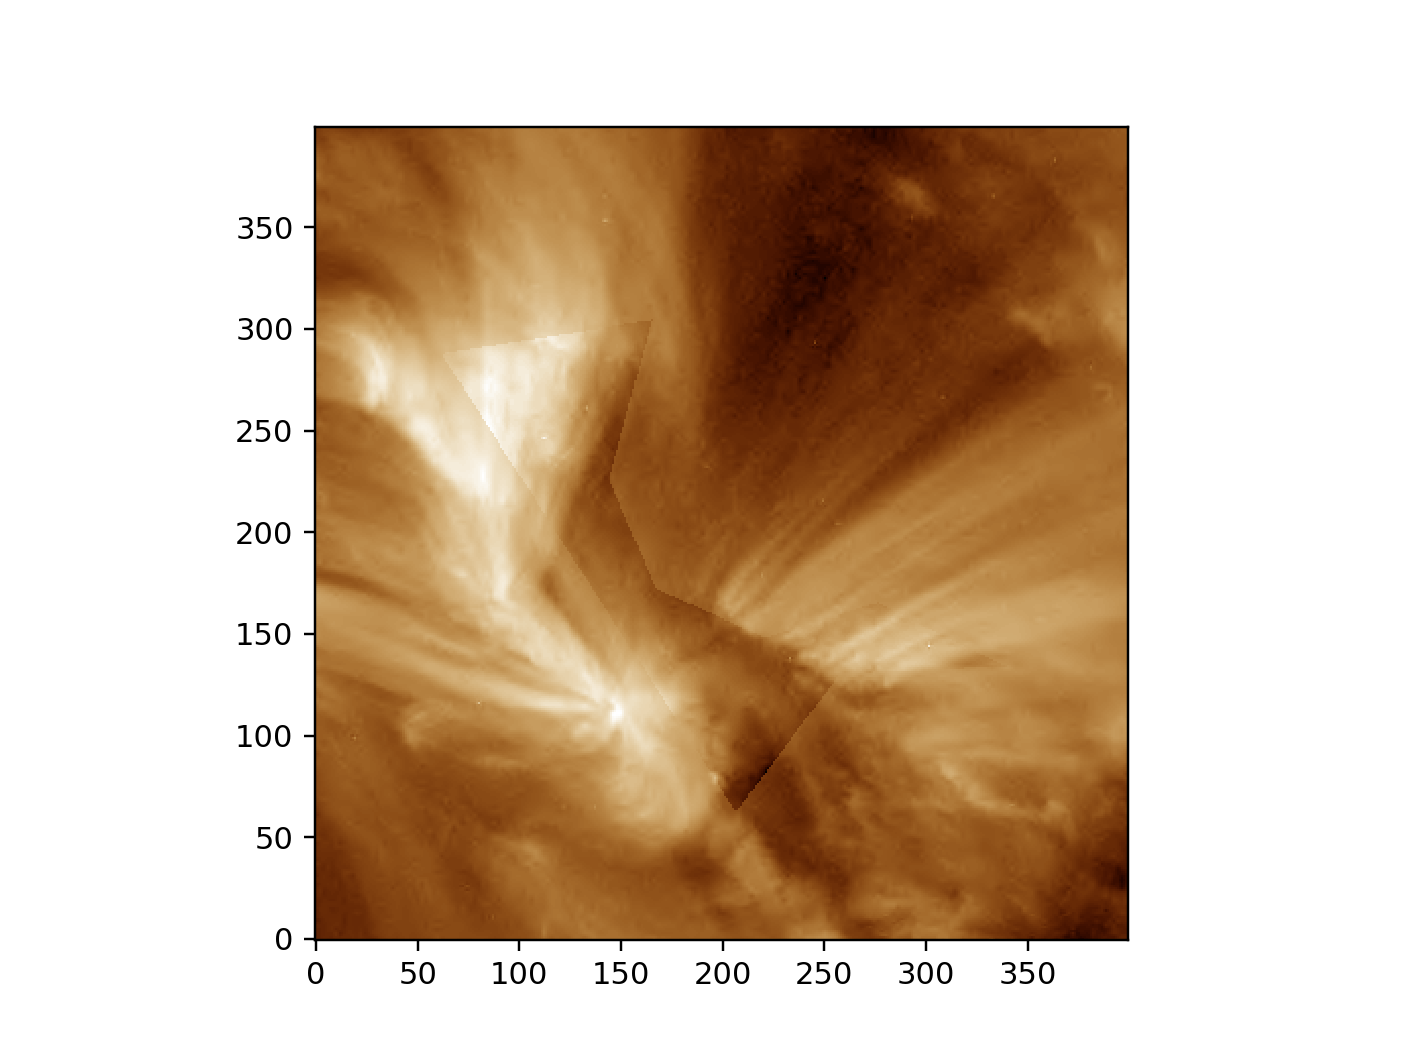

In [34]:
plt.imshow(masked[2800:3200,2800:3200], origin='bottom', cmap=sdoaia193)
plt.imshow(masked2[2800:3200,2800:3200], origin='bottom', cmap=sdoaia193)

Repeating for Sunspots

In [36]:
ss=np.load('/Volumes/SolarData/LabeledImages/2013_02/label_masks/2013_02_01__04_49_10__SS_mask.npz')
sspot = ss['arr_0'] 
hmi=glymur.Jp2k('/Volumes/SolarData/LabeledImages/2013_02/jp2/2013_02_01__04_49_10_30__SDO_HMI_HMI_continuum.jp2')
cont=hmi[:]

<IPython.core.display.Javascript object>


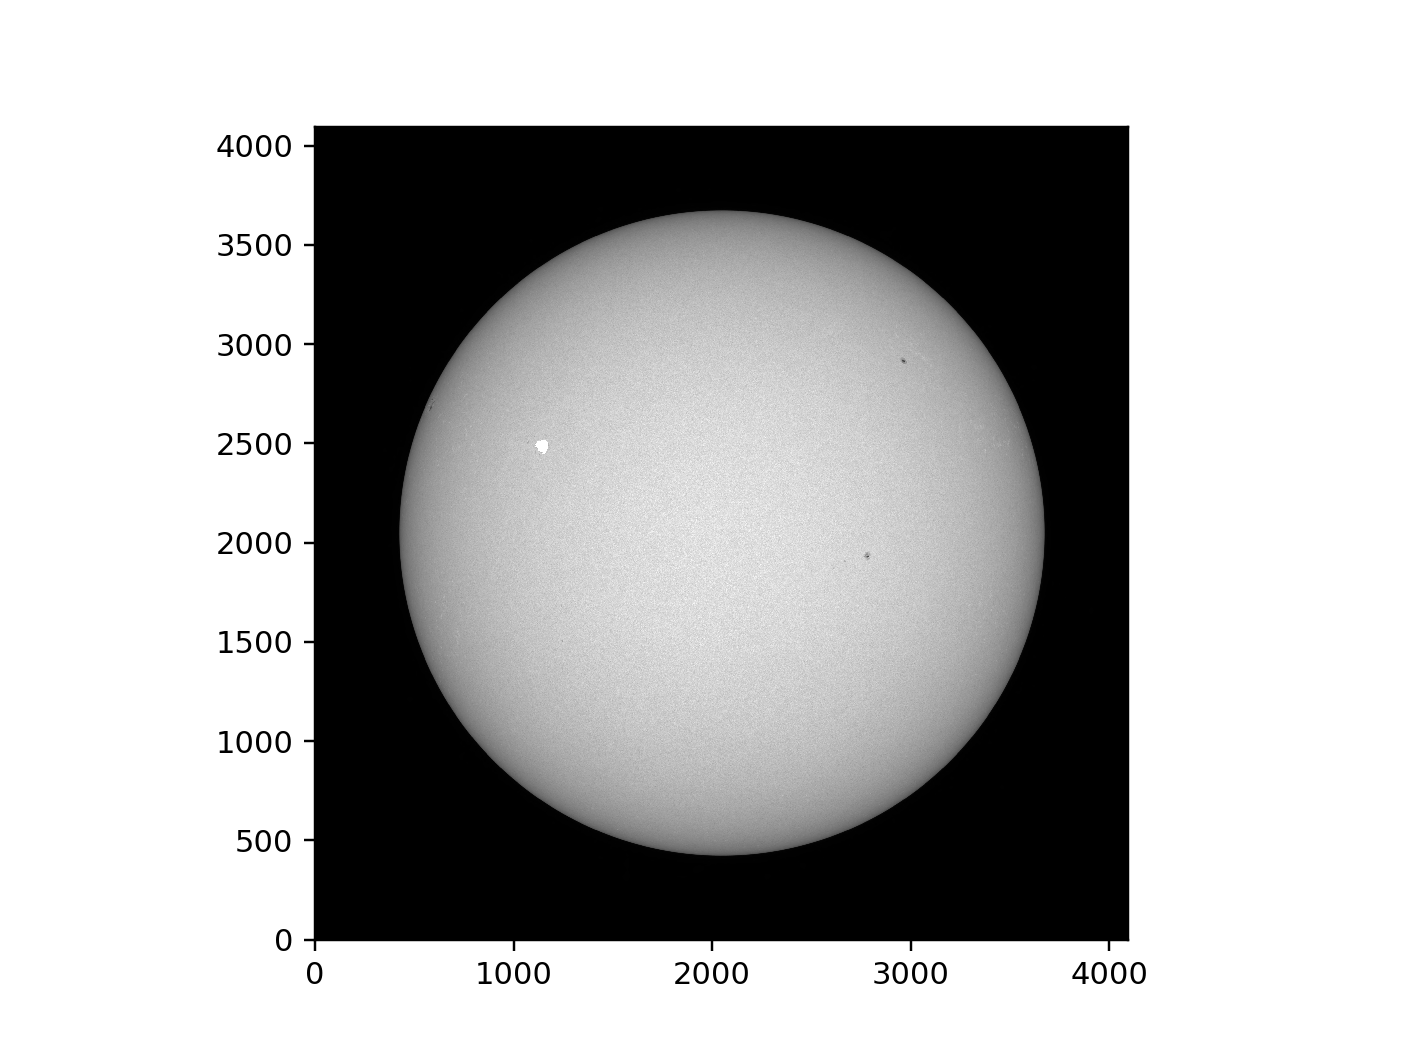

In [44]:
masked = np.ma.array(cont[::-1])
masked.mask = sspot
whitelight = plt.get_cmap('traceWL')
plt.imshow(masked, origin='bottom', cmap=whitelight)

<IPython.core.display.Javascript object>


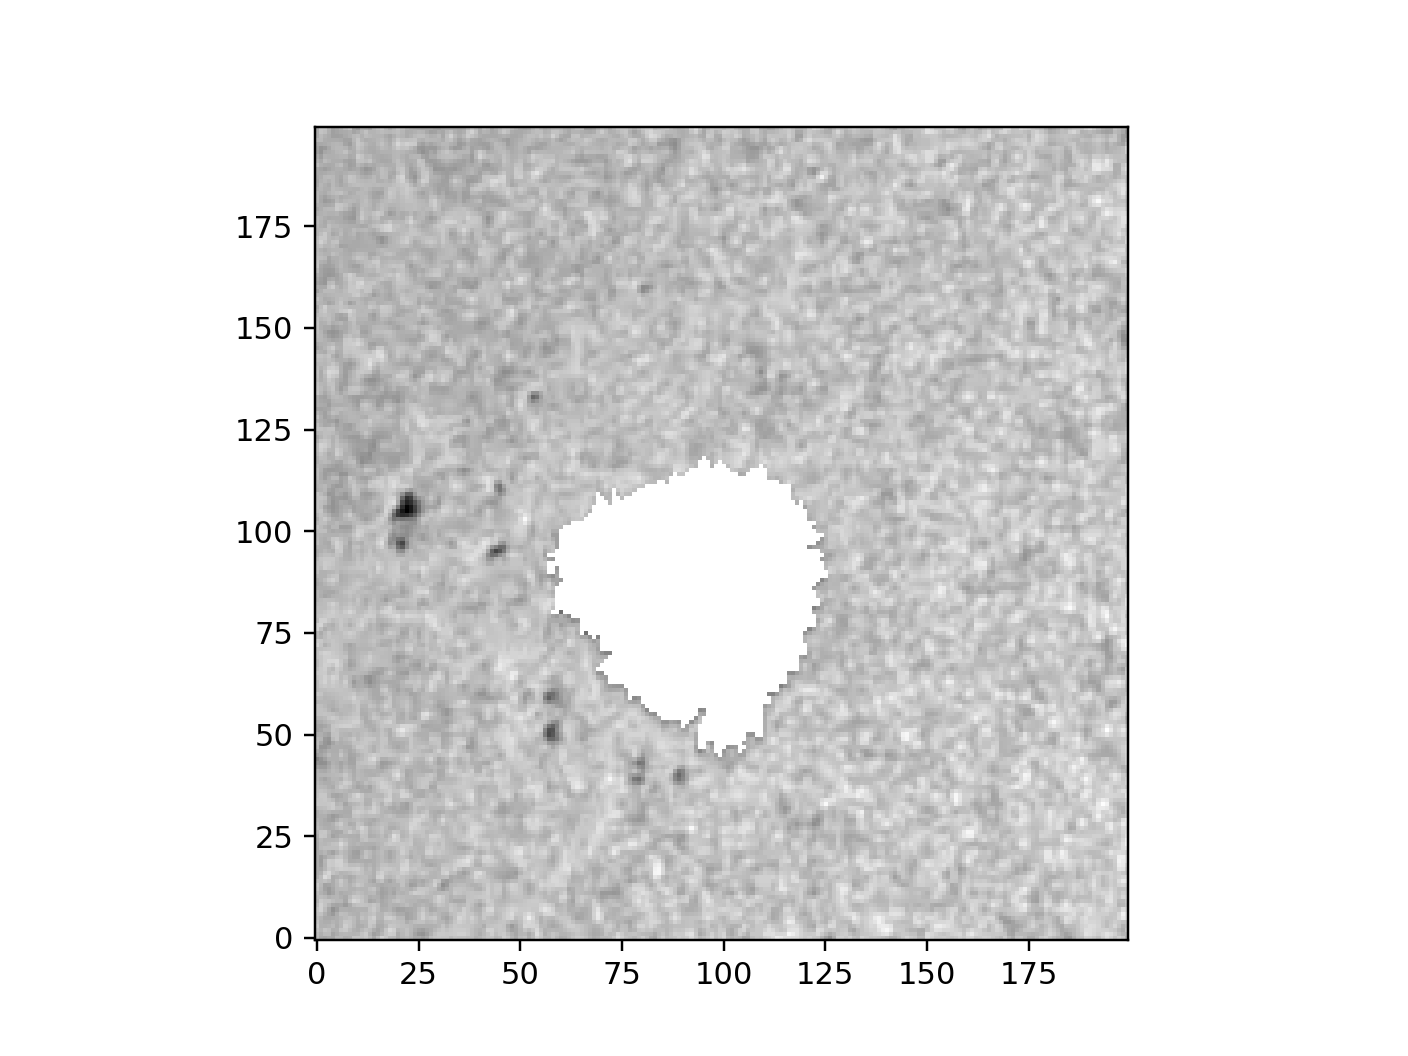

In [47]:
plt.imshow(masked[2400:2600,1050:1250], origin='bottom', cmap=whitelight)

<IPython.core.display.Javascript object>


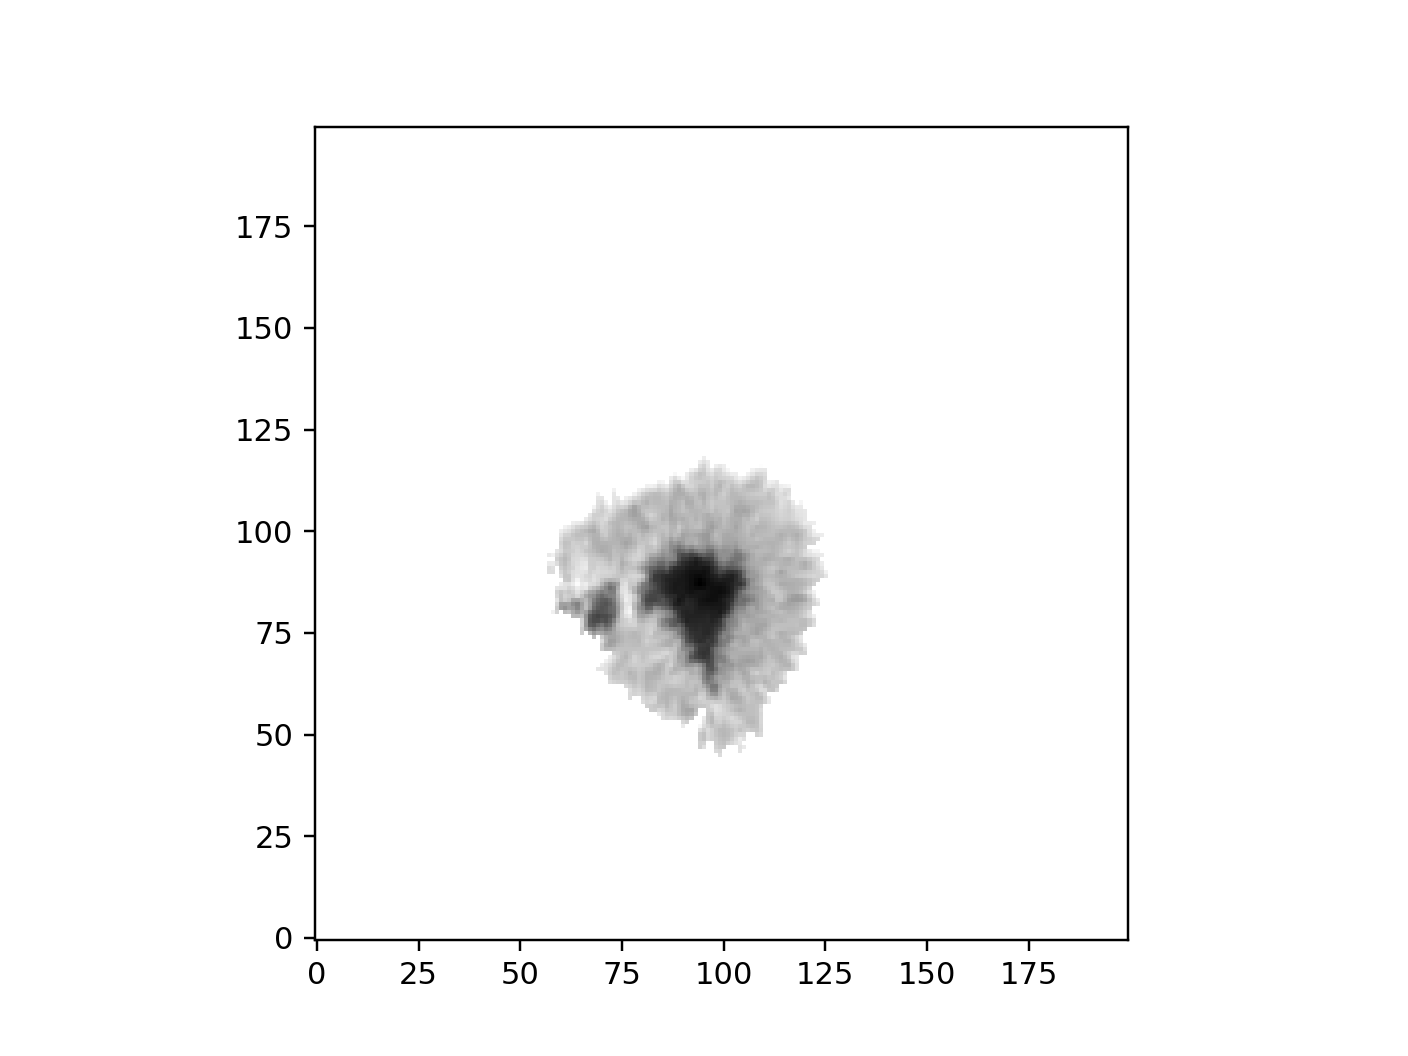

In [51]:
masked2 = np.ma.array(cont[::-1])
masked2.mask = np.invert(sspot)
plt.imshow(masked2[2400:2600,1050:1250], origin='bottom', cmap=whitelight)

<IPython.core.display.Javascript object>


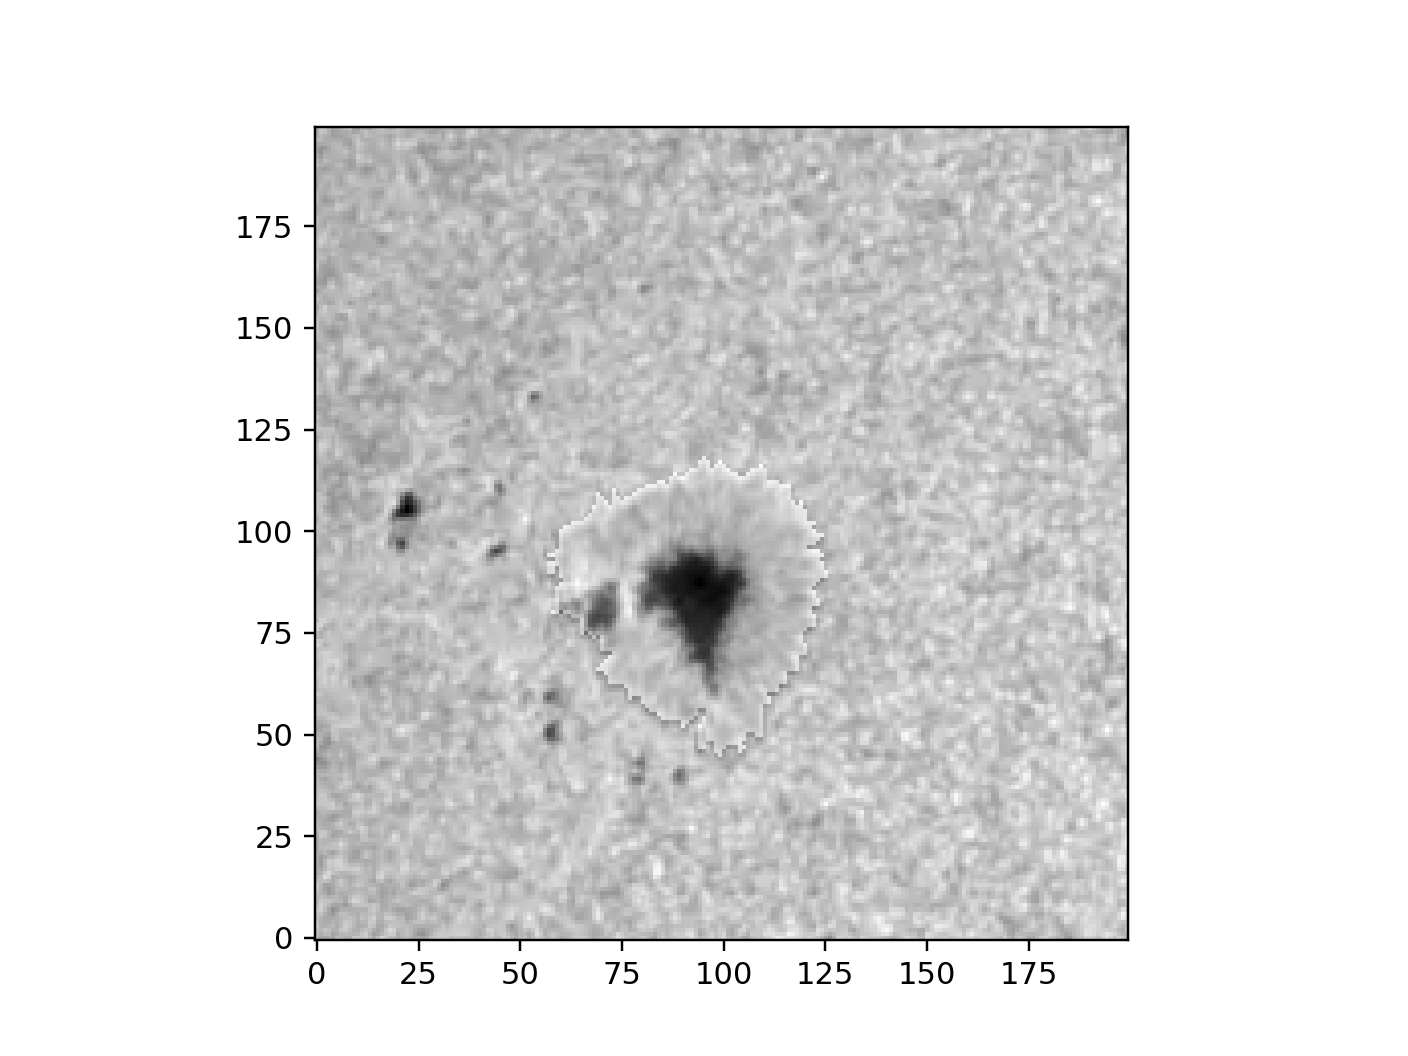

In [53]:
plt.imshow(masked[2400:2600,1050:1250], origin='bottom', cmap=whitelight)
plt.imshow(masked2[2400:2600,1050:1250], origin='bottom', cmap=whitelight)

The segmentation of the sunspot looks really good. It is spot on as far as I can tell.